In [12]:
from numberplate_extractor.plate_extractor import PlateExtractor
from numberplate_extractor.processing_pipeline import ProcessingPipeline
from PIL import Image
import matplotlib.pyplot as plt

In [13]:
plate_extractor = PlateExtractor()
processing_pipeline = ProcessingPipeline()

In [14]:
# Read image in
image = Image.open('real_test.png')

plt.imshow(image)
plt.title("Captured vehicle")
plt.xticks([])
plt.yticks([])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'real_test.png'

In [ ]:
# Get bounding box coordinates of plate
numberplate_prediction = plate_extractor.make_prediction(image)
xmin, ymin, xmax, ymax = plate_extractor.get_bounding_box(numberplate_prediction)

`post_process` is deprecated and will be removed in v5 of Transformers, please use `post_process_object_detection` instead, with `threshold=0.` for equivalent results.


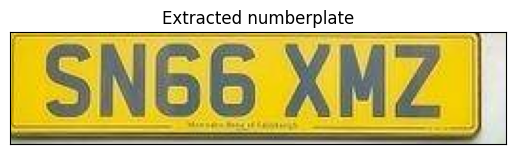

In [ ]:
# Crop the numberplate from the original image
numberplate = processing_pipeline.crop_numberplate_from_original(image, xmin, ymin, xmax, ymax)

plt.imshow(numberplate)
plt.title("Extracted numberplate")
plt.xticks([])
plt.yticks([])
plt.show()

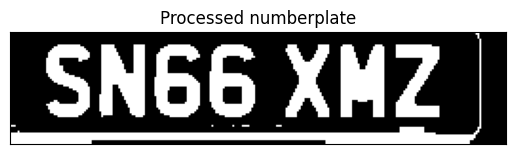

In [ ]:
# Apply the preprocessing pipeline and find contours of characters
processed_numberplate = processing_pipeline.apply_pipeline(numberplate)
contours = processing_pipeline.find_sorted_contours(processed_numberplate)

plt.imshow(processed_numberplate, cmap='gray')
plt.title("Processed numberplate")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
height, width = numberplate.shape[:2]
numberplate_string = plate_extractor.extract_chars(width, height, contours, numberplate)

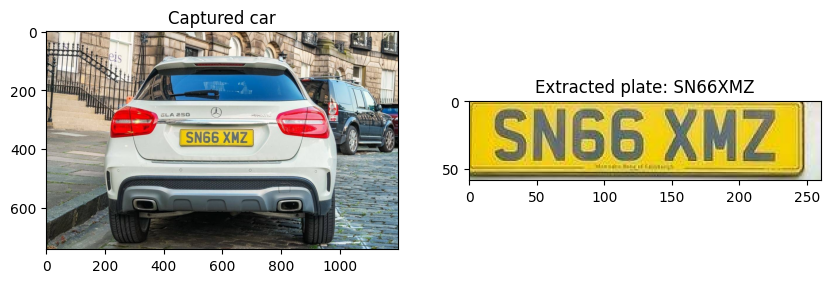

In [15]:
# Plot original and output
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].set_title("Captured car")

axes[1].imshow(numberplate)
axes[1].set_title(f"Extracted plate: {numberplate_string}")

plt.show()